In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [17]:
df = pd.read_csv(r'C:/Users/Venom/Desktop/694560_1215964_bundle_archive/city_temperature.csv')

D:\AnacondaNavigator\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Dropping duplicate rows

In [18]:
df.drop_duplicates(inplace=True)

#### Removing 2020 data as it is fairly recent and may contain imputed data

In [19]:
df = df[df.Year!=2020]
df.shape

(2847070, 8)

#### Removing outliers,i.e., data below -50 average temperature

In [20]:
df = df[df.AvgTemperature>=-50]

In [21]:
city_data = pd.read_csv(r'C:/Users/Venom/Desktop/694560_1215964_bundle_archive/city_data.csv')

In [22]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [23]:
city_data.head()

,City,Latitude,Longitude,dist_from_north,dist_from_south
0,Algiers,36.775361,3.060188,5681.128030,14295.190776
1,Bujumbura,-3.363812,29.367503,9673.430194,9425.151458
2,Cotonou,6.367695,2.425251,9023.170127,10976.304273
3,Bangui,4.390715,18.550913,8973.498059,10470.325176
4,Brazzaville,-4.269441,15.271226,9978.395930,9579.121495


In [24]:
df = pd.merge(df,city_data,on='City')

In [25]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Latitude,Longitude,dist_from_north,dist_from_south
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,36.775361,3.060188,5681.12803,14295.190776
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,36.775361,3.060188,5681.12803,14295.190776
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,36.775361,3.060188,5681.12803,14295.190776
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,36.775361,3.060188,5681.12803,14295.190776
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,36.775361,3.060188,5681.12803,14295.190776


In [26]:
df.drop('State',axis = 1, inplace=True)

In [27]:
df.dropna(inplace=True,axis = 0) #drop rows having null values as they are 0.32% in volume

In [28]:
df.shape

(2758800, 11)

#### No null values left

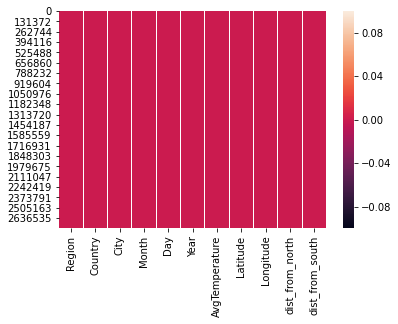

In [29]:
sns.heatmap(df.isna())

In [ ]:
df['Day']=df['Day'].astype(str)
df['Month']=df['Month'].astype(str)
df['Year']=df['Year'].astype(str)
df['Date']=df['Day'].astype(str)+'/'+df['Month'].astype(str)+'/'+df['Year'].astype(str)
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.sort_values(by = 'Date',ascending = True,inplace = True)

In [ ]:
df.head()

In [ ]:
df.nunique()

In [ ]:
df.describe()

In [ ]:
df.to_csv(r'C:/Users/Venom/Desktop/694560_1215964_bundle_archive/preprocessed_data.csv',index=False)